## **Импорты**

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.integrate import quad

## **Границы**

In [160]:
rng = 5

a = -rng
b = rng
prec = 0.01

## **Отрисовка**

In [161]:
def ShowFunc(func , name):
  plt.figure(figsize=(20,4))
  plt.title(name)
  arr= [func(i) for i in np.arange(a,b,prec) ]
  axis = np.arange(a,b,prec) 
  plt.plot( axis , arr,'r-')
  plt.grid(True)
  plt.show()

def ShowArr(arr , name):
  plt.figure(figsize=(20,4))
  plt.title(name)
  axis = np.arange(a,b,prec) 
  plt.plot( axis , arr,'r-')
  plt.grid(True)
  plt.show()

def ShowFourier(arr, name):
  plt.figure(figsize=(20,4))
  plt.title(name)
  axis = [i*1/prec/len(arr) for i in range(len(arr))]
  plt.xlim (0, np.max(axis)/2)
  plt.plot( axis , arr,'r-')
  plt.grid(True)
  plt.show()


In [162]:
def MeanSlider(arr , around):
  res = np.zeros(len(arr))
  step = int(around/2)
  orig_plus_zeros = np.zeros(len(arr) + 2*around)
  orig_plus_zeros[around: (len(arr) + around)] = arr 

  for i in range(len(arr)):
    res[i] = np.mean(orig_plus_zeros[i: i + 2*around+1])
  return res

## **Свертка**

In [163]:
def convol(func1 , func2):
  conv = np.convolve(func1 ,func2)
  a1 = abs(round(a/prec))
  b1 = abs(round((b-a)/prec)) + abs(round(a/prec))
  return conv[a1:b1]

## **Оригинал фильтра**

In [164]:
def rect(w1,w2):
  return lambda x: 1 if w1<x and x<w2 else 0

def filter(w1,w2):
  fil = np.fft.ifft([rect(w1,w2)(i) for i in np.arange(0,b-a,prec)])
  tmp = np.split(fil, 2)  
  return np.concatenate([tmp[1], tmp[0]])

## **Функции для тестов**

In [165]:
def TestFourierFilter(func,a1,b1 , r1,r2): 
  a1 = a1/50*rng
  b1 = b1/50*rng 

  ideal_fil = filter(a1,b1)
  ShowArr(ideal_fil ,"Ideal Filter")

  rct = [rect(r1,r2)(x) for x in np.arange(a,b,prec)]
  fil = rct * ideal_fil
  ShowArr(fil ,"Filter")

  rect_sign = [rect(a1,b1)(i) for i in np.arange(0,b-a,prec)]
  ShowFourier(rect_sign ,"Ideal filter fourier")

  ShowFourier(abs(np.fft.fft(fil)) , 'Filter fourier')

  four_sign = np.fft.fft([func(i) for i in np.arange(a,b,prec)])
  ShowFourier(abs(four_sign),"Function fourier")

  func_res = [func(i) for i in np.arange(a,b,prec) ]
  ShowArr(func_res,"Before filter")

  ShowArr(convol(func_res , fil),"After filter")

def TestMeanSlider(func,knn):
  arr = [func(i) for i in np.arange(a,b,prec)]
  ShowArr(arr , "Original")
  ShowArr(MeanSlider( arr, knn), "MeanSlider")

## **Тесты**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


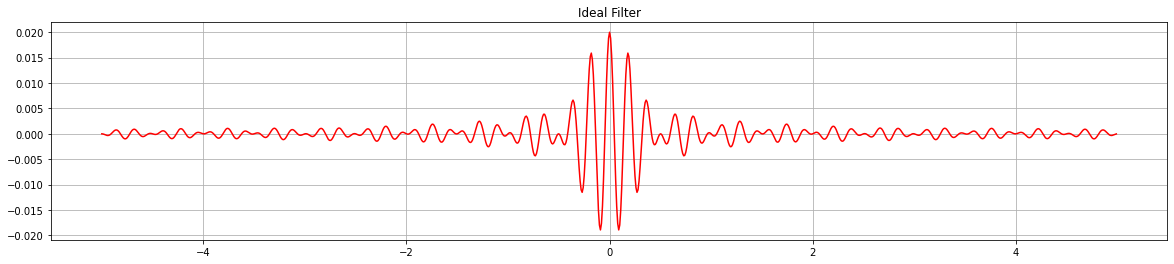

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


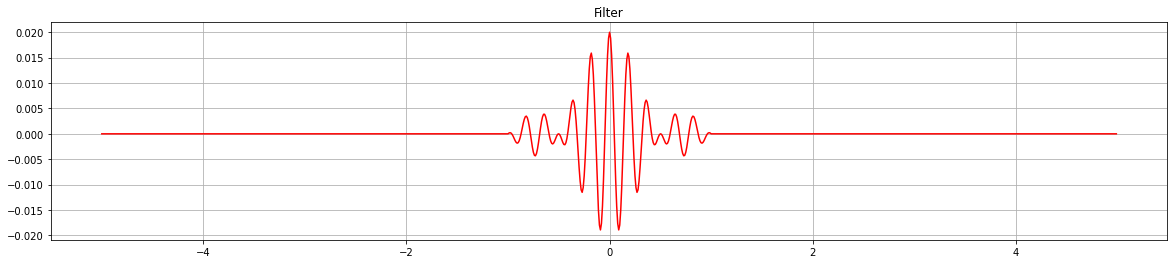

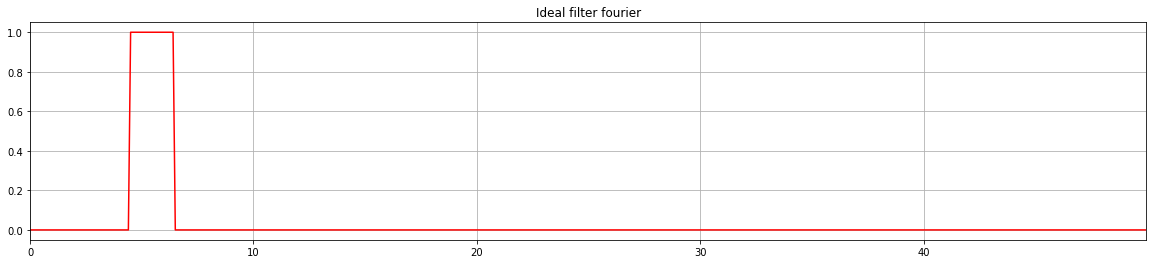

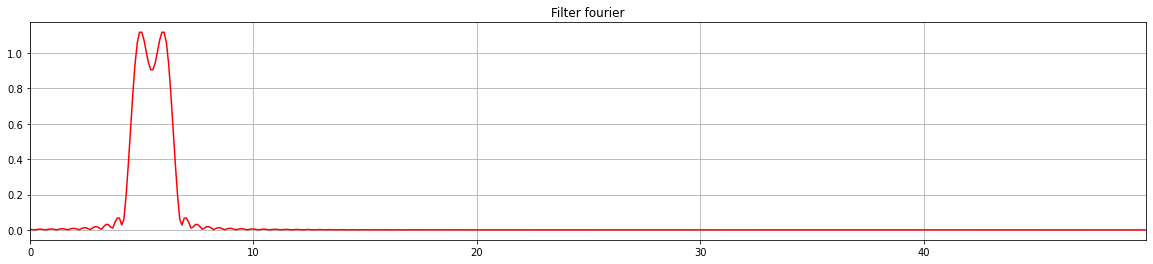

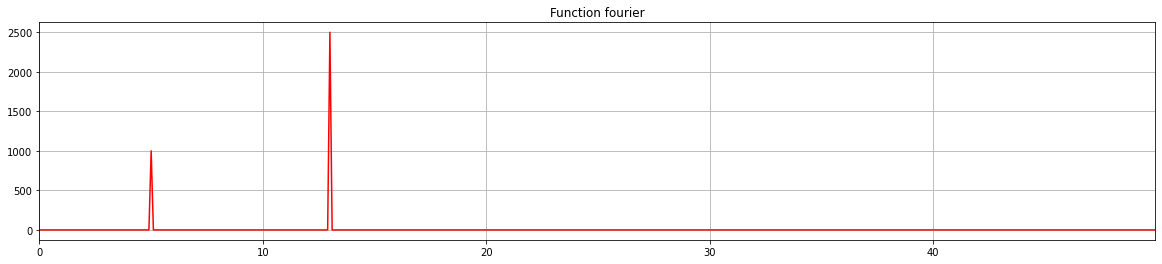

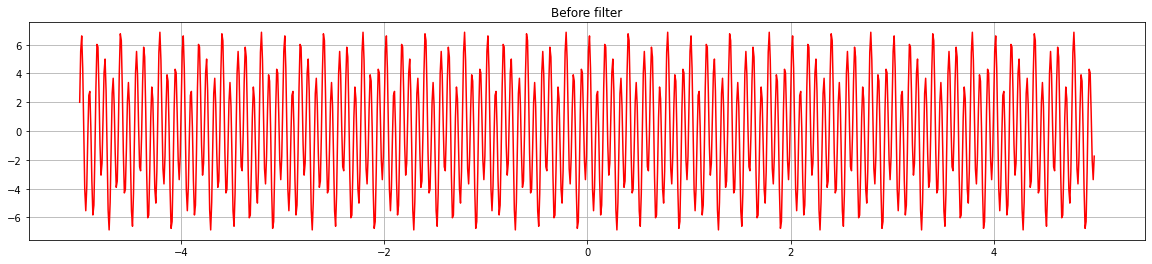

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


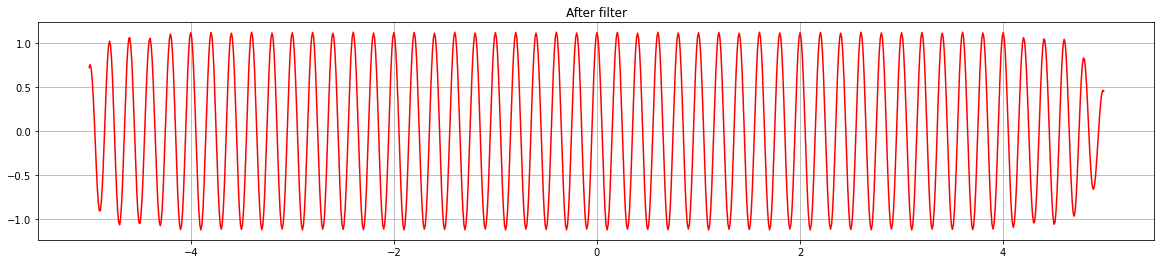

In [166]:
def cos_sin(a1,a2,w1,w2):
  return lambda x: a1*np.cos(w1*x*np.pi*2) + a2*np.sin(w2*x*np.pi*2)
TestFourierFilter(cos_sin(2,5,5,13) ,4.5,6.5 , -1,1)

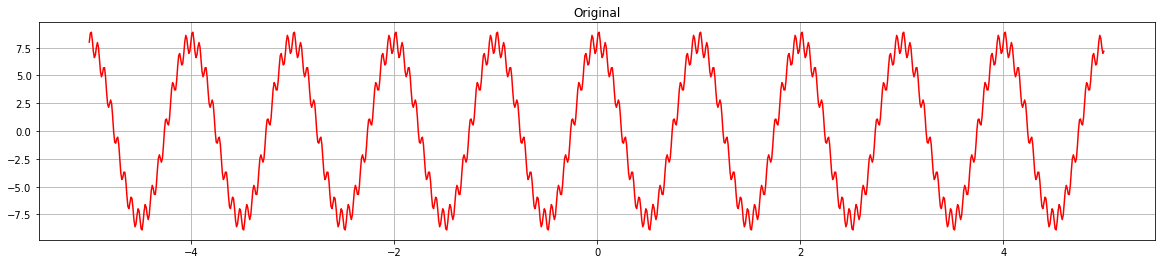

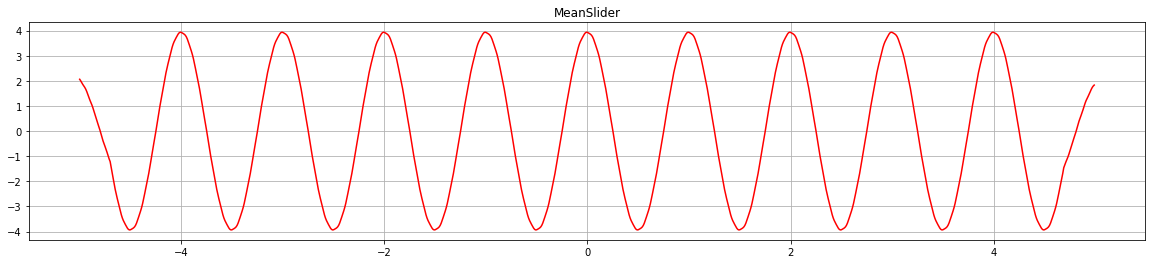

In [182]:
TestMeanSlider(cos_sin(8,1,1,15),30)

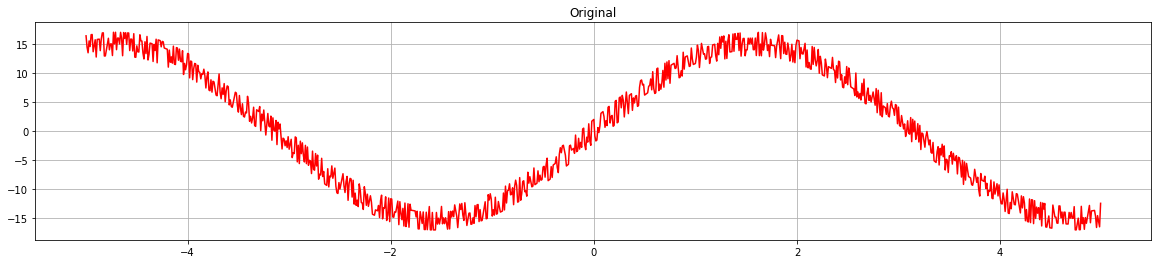

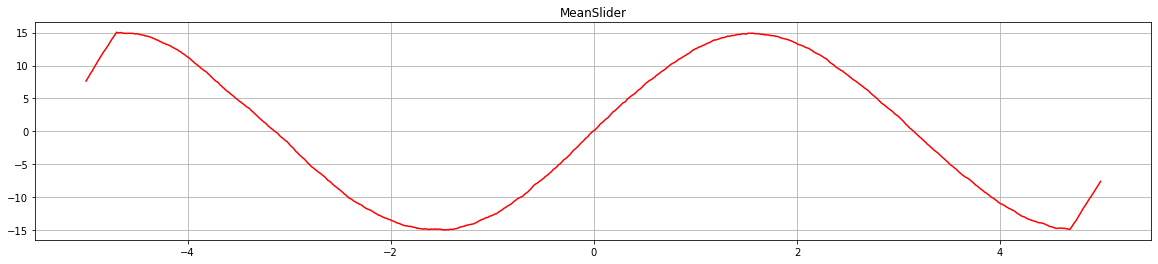

In [179]:
def sin_plus_rand(a,w,b):
  return lambda x: a*np.sin(x*w) + random.randint(-b,b) 
TestMeanSlider(sin_plus_rand(15,1,2),30)